In [22]:
######### 답안01 #########
import pandas as pd

In [23]:
######### 답안02 #########
df = pd.read_csv('./datasets/signal_AICE_20250915.csv')
df.head()

,RID,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Weekday,Hour,Day,Signaltype
0,1,2023-01-01 08:00:00,2023-01-01 08:30:00,15000,1800.0,30.0,서울특별시,강남구,4,8,1,10
1,2,2023-01-01 09:00:00,2023-01-01 09:45:00,20000,2700.0,26.6,경기도,성남시,4,9,1,15
2,3,2023-01-02 14:00:00,2023-01-02 14:20:00,10000,1200.0,30.0,인천광역시,남동구,3,14,2,8
3,4,2023-01-02 18:00:00,2023-01-02 19:00:00,25000,3600.0,25.0,서울특별시,마포구,3,18,2,20
4,5,2023-01-03 07:30:00,2023-01-03 08:10:00,18000,2400.0,27.0,경기도,수원시,6,7,3,12


In [24]:
# 코드 실행
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

0


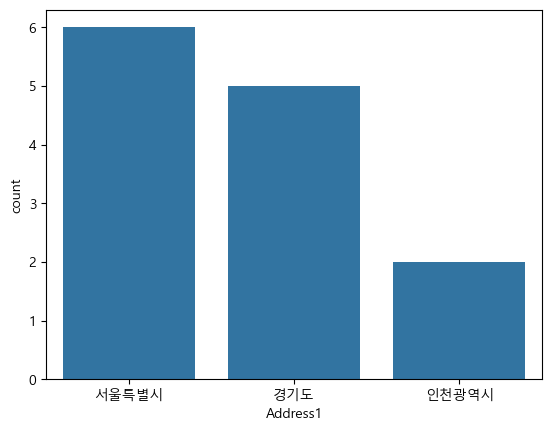

In [25]:
######### 답안03 #########
sns.countplot(data=df, x='Address1')
print(len(df[df['Address1'] == '-']))   # 답안03 계산(답안 작성후 이 줄은 삭제해야 함)
df = df[(df['Address1'] != '-')]
답안03 = 3

In [26]:
######### 답안04 #########
답안04_1 = 'corr()'
답안04_2 = 'Time_Driving'

column_list = ['Distance', 'Time_Driving', 'Speed_Per_Hour', 'Weekday', 'Hour', 'Day', 'Signaltype']
df[column_list].corr()

,Distance,Time_Driving,Speed_Per_Hour,Weekday,Hour,Day,Signaltype
Distance,1.000000,0.924252,-0.747551,0.066902,-0.006511,-0.235264,0.970225
Time_Driving,0.924252,1.000000,-0.774939,-0.134667,0.282975,-0.309021,0.958134
Speed_Per_Hour,-0.747551,-0.774939,1.000000,-0.241420,-0.236923,0.338716,-0.734425
Weekday,0.066902,-0.134667,-0.241420,1.000000,-0.299518,-0.151326,-0.009048
Hour,-0.006511,0.282975,-0.236923,-0.299518,1.000000,0.038151,0.163086
Day,-0.235264,-0.309021,0.338716,-0.151326,0.038151,1.000000,-0.172760
Signaltype,0.970225,0.958134,-0.734425,-0.009048,0.163086,-0.172760,1.000000


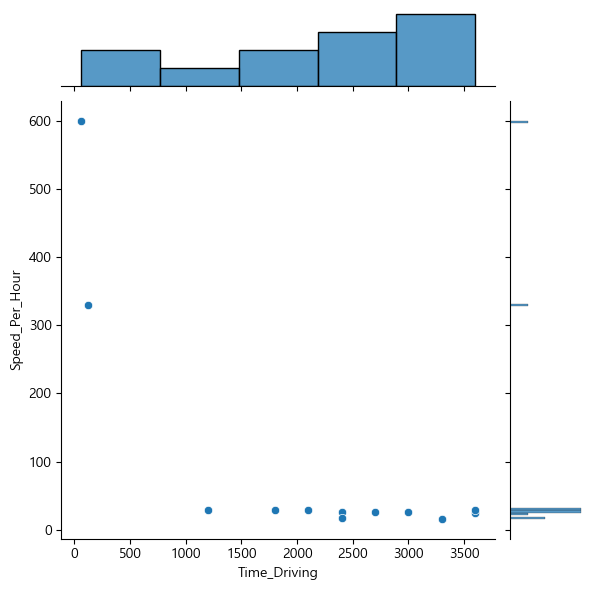

In [27]:
######### 답안05 #########
sns.jointplot(df, x='Time_Driving', y='Speed_Per_Hour')

In [28]:
######### 답안06 #########
df_temp = df[df['Speed_Per_Hour'] < 300]
df_temp.drop(columns='RID', inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 12
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Departure  11 non-null     object 
 1   Time_Arrival    11 non-null     object 
 2   Distance        11 non-null     int64  
 3   Time_Driving    10 non-null     float64
 4   Speed_Per_Hour  11 non-null     float64
 5   Address1        11 non-null     object 
 6   Address2        11 non-null     object 
 7   Weekday         11 non-null     int64  
 8   Hour            11 non-null     int64  
 9   Day             11 non-null     int64  
 10  Signaltype      11 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ KB


In [29]:
######### 답안07 #########
df_temp.isnull().sum()      # 결측치 갯수 확인
df_na = df_temp.dropna()    # 결측치 제거
df_na.isnull().sum()        # 결측치 제거 확인
답안07 = 2

In [30]:
######### 답안08 #########
df_del = df_na.drop(columns=['Time_Departure', 'Time_Arrival'])
df_del

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Weekday,Hour,Day,Signaltype
0,15000,1800.0,30.00,서울특별시,강남구,4,8,1,10
1,20000,2700.0,26.60,경기도,성남시,4,9,1,15
2,10000,1200.0,30.00,인천광역시,남동구,3,14,2,8
3,25000,3600.0,25.00,서울특별시,마포구,3,18,2,20
4,18000,2400.0,27.00,경기도,수원시,6,7,3,12
5,22000,3000.0,26.40,서울특별시,송파구,2,12,4,18
6,30000,3600.0,30.00,경기도,고양시,1,9,5,22
7,15000,3300.0,16.36,서울특별시,종로구,1,17,5,16
9,12000,2400.0,18.00,인천광역시,부평구,0,15,6,9
10,17000,2100.0,29.14,서울특별시,강서구,5,11,7,14


In [31]:
######### 답안09 #########
df_preset = pd.get_dummies(df_del, columns=['Address1', 'Address2'])
df_preset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 10
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        10 non-null     int64  
 1   Time_Driving    10 non-null     float64
 2   Speed_Per_Hour  10 non-null     float64
 3   Weekday         10 non-null     int64  
 4   Hour            10 non-null     int64  
 5   Day             10 non-null     int64  
 6   Signaltype      10 non-null     int64  
 7   Address1_경기도    10 non-null     bool   
 8   Address1_서울특별시  10 non-null     bool   
 9   Address1_인천광역시  10 non-null     bool   
 10  Address2_강남구    10 non-null     bool   
 11  Address2_강서구    10 non-null     bool   
 12  Address2_고양시    10 non-null     bool   
 13  Address2_남동구    10 non-null     bool   
 14  Address2_마포구    10 non-null     bool   
 15  Address2_부평구    10 non-null     bool   
 16  Address2_성남시    10 non-null     bool   
 17  Address2_송파구    10 non-null     bool   
 1

In [32]:
######### 답안10 #########
y = df_preset.pop('Time_Driving')
X = df_preset
print('X, y shape:', X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_valid = rs.transform(X_valid)

X, y shape: (10, 19) (10,)
(8, 19) (2, 19) (8,) (2,)


In [33]:
######### 답안11 #########
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(max_depth=5, min_samples_split=3, random_state=120)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
######### 답안12 #########
y_pred_dt = dt.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

from sklearn.metrics import mean_absolute_error
dt_mae = mean_absolute_error(y_valid, y_pred_dt)
rf_mae = mean_absolute_error(y_valid, y_pred_dt)
print(dt_mae, rf_mae)
답안12 = 'randomforest'

825.0 825.0


In [35]:
# 코드 실행
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(1)

In [ ]:
######### 답안13 #########
model = Sequential()
model.add(Input((X.shape[1],)))   # keras recommend this.
# model.add(Dense(64, activation='selu', input_dim=X.shape[1]))   # use input_dim for 1D data.  input_shape(X_shape[1],) for 2D.
model.add(Dense(64, activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='selu'))
model.add(Dense(16, activation='selu'))
model.add(Dense(1, activation='linear'))

es = EarlyStopping(monitor='val_loss', patience=9)
ms = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)   # save file '.h5' format is deprecated.
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data = (X_valid, y_valid), callbacks=[es, ms])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - loss: 7580873.5000 - mse: 7580873.5000 - val_loss: 6521167.0000 - val_mse: 6521167.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 7579445.0000 - mse: 7579445.0000 - val_loss: 6519443.0000 - val_mse: 6519443.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 7578548.5000 - mse: 7578548.5000 - val_loss: 6517773.0000 - val_mse: 6517773.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 7576435.0000 - mse: 7576435.0000 - val_loss: 6516058.0000 - val_mse: 6516058.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 7575496.5000 - mse: 7575496.5000 - val_loss: 6514348.0000 - val_mse: 6514348.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7573522.0000 - mse: 7573522.0000 - val_loss: 6512624.0000 - val_mse: 6512624.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7572834.5000 - mse: 7572834.5000 - val_loss: 6510852.0000 - val_mse: 6510852.0000
Epoch 8/20
1/1 ━━━━━━━━━━━

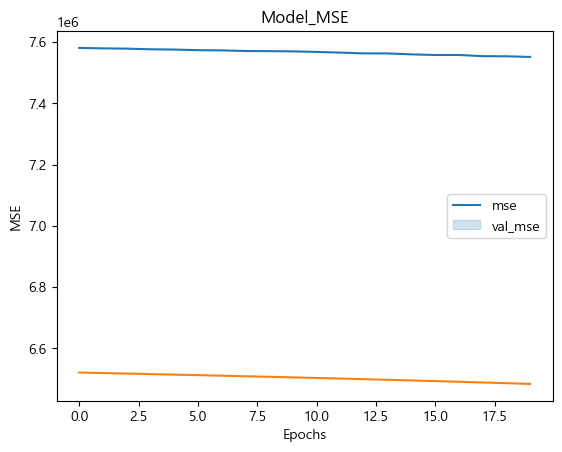

In [37]:
######### 답안14 #########
sns.lineplot(history.history['mse'])
sns.lineplot(history.history['val_mse'])
plt.title('Model_MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['mse', 'val_mse'])
plt.show()